In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     #for visualization
%matplotlib inline
import seaborn as sns               #for visualization
import warnings
warnings.filterwarnings('ignore')

In [1]:
import mysql.connector
mydb=mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="Poi1poi1#",
    database="test",
    auth_plugin='mysql_native_password'
    )
print(mydb)

mycursor=mydb.cursor()
mycursor.execute("SHOW DATABASES")

for db in mycursor:
    print(db)

('information_schema',)
('mysql',)
('performance_schema',)
('sys',)
('test',)


In [3]:
query="SELECT * FROM Retail"
df=pandas.read_sql(query,mydb)

In [4]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010,2.55,17850,United Kingdom\r
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010,3.39,17850,United Kingdom\r
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010,2.75,17850,United Kingdom\r


## Country With Highest No of Orders:

In [136]:
query="SELECT Country,COUNT(*) AS Orders FROM Retail GROUP BY Country LIMIT 5"
df=pandas.read_sql(query,mydb)
df

,Country,Orders
0,United Kingdom\r,348872
1,France\r,8019
2,Australia\r,1180
3,Netherlands\r,2322
4,Germany\r,8643


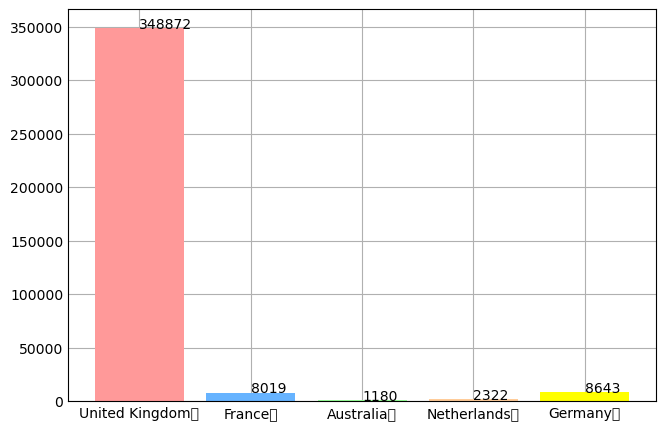

In [137]:
y = df.Orders
x = df.Country
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#FFFF00']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
plt.figure(figsize=(6,4))
plt.bar(x,y, color=colors)
addlabels(x,y)
plt.show()

## Customer with Highest Orders Placed:

In [123]:
query="SELECT CustomerID,COUNT(*) AS Orders FROM Retail GROUP BY CustomerID ORDER BY Count(*) DESC LIMIT 5"
df=pandas.read_sql(query,mydb)
df

,CustomerID,Orders
0,17841,7667
1,14911,5584
2,14096,5095
3,12748,4397
4,14606,2674


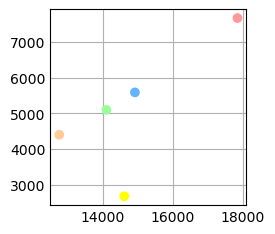

In [131]:
y = df.Orders
x = df.CustomerID
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#FFFF00']      
plt.scatter(x,y,color=colors)
plt.show()

## Total Amount Generated by Retail:

In [7]:
query="SELECT ROUND(SUM(Quantity),0) AS TotalQuantity,ROUND(SUM(UnitPrice),2) AS TotalPrice FROM Retail"
df=pandas.read_sql(query,mydb)
df

,TotalQuantity,TotalPrice
0,5141784.0,1124310.75


In [8]:
query="SELECT ROUND(SUM(Quantity * UnitPrice)) AS TotalRetail FROM Retail;"
df=pandas.read_sql(query,mydb)
df

,TotalRetail
0,8737228.0


## Top Selling Product:

In [133]:
query="SELECT Description,COUNT(*) AS Orders FROM Retail GROUP BY Description ORDER BY Count(*) DESC LIMIT 5"
df=pandas.read_sql(query,mydb)
df

,Description,Orders
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


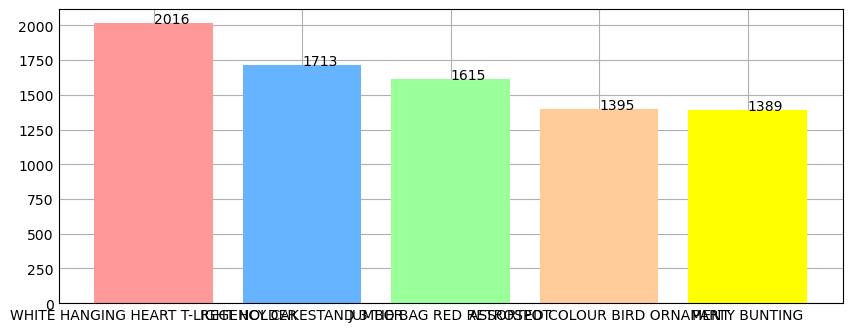

In [135]:
y = df.Orders
x = df.Description
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#FFFF00']
#explsion
explode = (0.05,0.05,0.05,0.05,0.05)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
plt.figure(figsize=(8,3))
plt.bar(x,y, color=colors)
addlabels(x,y)
plt.show()

## Product with Highest Unit Price:

In [10]:
query="SELECT DISTINCT Description , UnitPrice FROM retail WHERE unitprice = (SELECT MAX(unitprice) FROM retail)"
df=pandas.read_sql(query,mydb)
df

,Description,UnitPrice
0,PICNIC BASKET WICKER 60 PIECES,649.5


## Product with Lowest Unit Price:

In [11]:
query="SELECT DISTINCT Description , UnitPrice FROM retail WHERE unitprice = (SELECT MIN(unitprice) FROM retail)"
df=pandas.read_sql(query,mydb)
df

,Description,UnitPrice
0,POPART WOODEN PENCILS ASST,0.04


## Average Unit Price of the Products Listed:

In [12]:
query="SELECT AVG(UnitPrice) AS AveragePrice FROM retail "
df=pandas.read_sql(query,mydb)
df

,AveragePrice
0,2.874372


In [138]:
query="SELECT * FROM retail "
df=pandas.read_sql(query,mydb)
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010,2.55,17850,United Kingdom\r
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010,3.39,17850,United Kingdom\r
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010,2.75,17850,United Kingdom\r
